This example uses Bayes' theorem to determine the likelihood of heads for a coin flip, for which the coin may be biased

Heavily adapted from https://www.thomasjpfan.com/2015/09/bayesian-coin-flips/

In [27]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib as mpl
#import seaborn as sns
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## In-class notes

For a coin flip, we assume for our
- 'likelihood' function a binomial distribution
$$ P(D|\theta) = \binom{N}{k} p^k(1-p)^{N-k}$$
- 'prior' a Beta distribution 
$$P(\theta) = \dfrac{1}{B(\alpha,\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}$$
- denominator, $P(D)$ probability of the event happening, e.g.
$$ P(D) = \int_0^1 P(D|\theta)P(\theta)d\theta $$

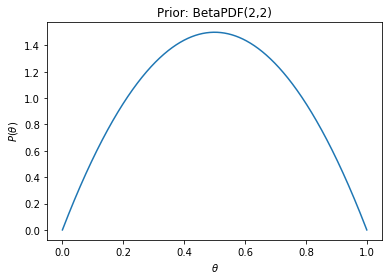

In [28]:
# plot of the prior
def plot_prior(alpha, beta, ax=None):
    x = np.linspace(0, 1, 1000)
    # beta function that we use 
    y = scipy.stats.beta.pdf(x, alpha, beta)

    if not ax:
        fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(r"$\theta$", fontsize=10)
    ax.set_ylabel(r"$P(\theta)$", fontsize=10)
    ax.set_title("Prior: BetaPDF({},{})".format(alpha,beta));
    
plot_prior(alpha=2, beta=2)

Our posterior
$$P(\theta|D) = \dfrac{P(D|\theta)P(\theta)}{P(D)}$$
provides the likelihood that $\theta$ assumes a given value, based on the observation $D$


In [29]:
def plot_posterior(heads, tails, alpha, beta, ax=None):
    x = np.linspace(0, 1, 1000)
    # the posterior assumes an analytical form here for this coin flip problem 
    y = scipy.stats.beta.pdf(x, heads+alpha, tails+beta)
        
    if not ax:
        fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(r"$\theta$", fontsize=10)
    ax.set_ylabel(r"$P(\theta|D)$", fontsize=10)
    ax.set_title("Posterior after {} heads, {} tails, \
                 Prior: BetaPDF({},{})".format(heads, tails, alpha, beta));

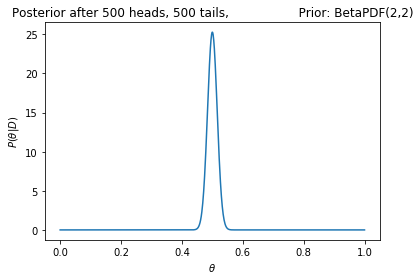

In [30]:
plot_posterior(heads=500, tails=500, alpha=2, beta=2)

Here we demonstrate how successive guesses shift the most probable value of $\theta$

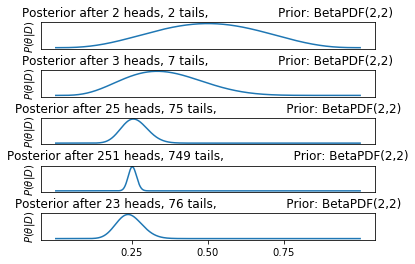

In [33]:
fig, axes = plt.subplots(5)
flips = [(2,2),(3, 7), (25, 75), (251, 749),(23,76)]
for i, flip in enumerate(flips):
    plot_posterior(heads=flip[0], tails=flip[1], alpha=2, beta=2, ax=axes[i])
    axes[i].set_yticks([])
fig.subplots_adjust(hspace=0.8)
for ax in axes:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlabel("")
axes[4].set_xticks([0.25,0.5,0.75]);

## In-class example
In this example, I have written a coin flipper:

-flipper(nRolls, mode="A")

nRolls sets the number of rolls used, while 'mode' is a coin. One of the coins ("A", "B", .... "F") is biased 

Here is an example using an unbiased coin (theta=0.5)

In [37]:
import bayes
outcomes = bayes.flipper(nRolls = 10,mode="A")
print "Outcomes: ",''.join(outcomes)

Outcomes:  tthtththth


In [38]:
hs,ts = bayes.countHeadsTails(outcomes)
print "Num heads %d, Tails %d"%(hs,ts)


Num heads 4, Tails 6


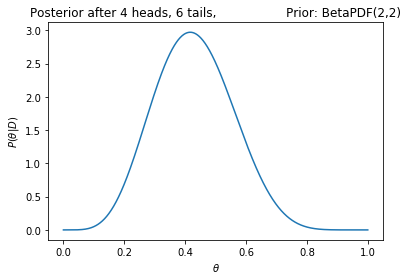

In [39]:
plot_posterior(heads=hs, tails=ts, alpha=2, beta=2)

- try different number of rolls and different coin modes
- which one is biased and what is its bias?